## Connect to MySQL Database

In [2]:
import mysql.connector
import pandas as pd

# Step 1: Connect to the MySQL database
connection = mysql.connector.connect(
    host="localhost",         
    user="root",     
    password="PennePasta1224", 
    database="food_data"  
)

# Step 2: Write a SQL query
query = "SELECT * FROM food_data_table"

# Step 3: Use pandas to execute the query and temporarily store data
try:
    data = pd.read_sql(query, connection)  # Temporary storage in a DataFrame
    print("Data temporarily stored in a DataFrame:")
    print(data.head())  # Display the first few rows
finally:
    # Step 4: Close the connection
    connection.close()

# Perform operations on the DataFrame
print(f"Number of rows: {data.shape[0]}")
print(f"Columns in the DataFrame: {list(data.columns)}")

C:\Users\Ajay Manshani\AppData\Local\Temp\ipykernel_25676\270200781.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, connection)  # Temporary storage in a DataFrame


Data temporarily stored in a DataFrame:
         date    state   district     market   latitude  longitude  \
0  1994-01-15    Delhi      Delhi      Delhi  28.666667  77.216667   
1  1994-01-15    Delhi      Delhi      Delhi  28.666667  77.216667   
2  1994-01-15    Delhi      Delhi      Delhi  28.666667  77.216667   
3  1994-01-15  Gujarat  Ahmadabad  Ahmedabad  23.033333  72.616667   
4  1994-01-15  Gujarat  Ahmadabad  Ahmedabad  23.033333  72.616667   

             category      commodity unit priceflag price  year  month  
0  cereals and tubers           Rice   KG    actual   8.0  1994      1  
1  cereals and tubers          Wheat   KG    actual   5.0  1994      1  
2        oil and fats  Oil (mustard)   KG    actual  31.0  1994      1  
3  cereals and tubers           Rice   KG    actual   6.8  1994      1  
4  miscellaneous food          Sugar   KG    actual  13.5  1994      1  
Number of rows: 167198
Columns in the DataFrame: ['date', 'state', 'district', 'market', 'latitude', 

In [3]:
data

,date,state,district,market,latitude,longitude,category,commodity,unit,priceflag,price,year,month
0,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,8.0,1994,1
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,5.0,1994,1
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,31.0,1994,1
3,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,6.8,1994,1
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,miscellaneous food,Sugar,KG,actual,13.5,1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167193,2024-10-15,Rajasthan,Jaipur,North Zone,26.938847668483717,75.80005600628787,oil and fats,Oil (sunflower),KG,actual,146.26,2024,10
167194,2024-10-15,Rajasthan,Jaipur,North Zone,26.938847668483717,75.80005600628787,pulses and nuts,Lentils,KG,actual,160.16,2024,10
167195,2024-10-15,Rajasthan,Jaipur,North Zone,26.938847668483717,75.80005600628787,pulses and nuts,Lentils (masur),KG,actual,89.6,2024,10
167196,2024-10-15,Rajasthan,Jaipur,North Zone,26.938847668483717,75.80005600628787,vegetables and fruits,Onions,KG,actual,53.86,2024,10


In [4]:
# filtering the data for one food item on which we will be performing the forecast
data = data[data['commodity'] == 'Wheat']

In [5]:
# Sorting data by Date
data = data.sort_values(by='date')

In [6]:
data

,date,state,district,market,latitude,longitude,category,commodity,unit,priceflag,price,year,month
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,5.0,1994,1
8,1994-01-15,Karnataka,Bangalore Urban,Bengaluru,12.962299,77.576943,cereals and tubers,Wheat,KG,actual,7.0,1994,1
11,1994-01-15,Madhya Pradesh,Bhopal,Bhopal,23.266667,77.4,cereals and tubers,Wheat,KG,actual,4.5,1994,1
14,1994-01-15,Maharashtra,Mumbai city,Mumbai,18.975,72.825833,cereals and tubers,Wheat,KG,actual,8.0,1994,1
18,1994-01-15,Orissa,Khordha,Bhubaneshwar,20.233333,85.833333,cereals and tubers,Wheat,KG,actual,5.0,1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167083,2024-09-15,Orissa,Dhenkanal,East Zone,20.674910800278717,85.85658108973118,cereals and tubers,Wheat,KG,actual,30.77,2024,9
167132,2024-10-15,Karnataka,Bangalore Rural,South Zone,13.19992672527012,77.63497931024838,cereals and tubers,Wheat,KG,actual,43.7,2024,10
167149,2024-10-15,Maharashtra,Thane,West Zone,19.46788701036416,72.85075125648392,cereals and tubers,Wheat,KG,actual,32.33,2024,10
167118,2024-10-15,Assam,Darrang,North-East Zone,26.42063358137257,91.8078670032586,cereals and tubers,Wheat,KG,actual,39.93,2024,10


## Data Preparation

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import datetime

In [9]:
# Create lag feature (1-month lag)
data['lag_1'] = (
    data.groupby(['state', 'district', 'market', 'commodity'])['price']
    .shift(1)
)

# Create rolling mean feature (3-month rolling average)
data['rolling_mean_3'] = (
    data.groupby(['state', 'district', 'market', 'commodity'])['price']
    .transform(lambda x: x.rolling(window=3).mean())
)

# Cyclic Encoding for Month
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)

# Drop rows with NaN values (introduced by lag and rolling calculations)
data = data.dropna()

# One-Hot Encoding for Categorical Variables
encoded_data = pd.get_dummies(data, columns=['state', 'district', 'market', 'category', 'commodity'], drop_first=True)

In [10]:
encoded_data = encoded_data.drop('date', axis=1)
encoded_data = encoded_data.drop('unit', axis=1)
encoded_data = encoded_data.drop('priceflag', axis=1)

In [11]:
# Define features (X) and target (y)
X = encoded_data.drop(['price'], axis=1)  # Drop the target variable
y = encoded_data['price']  # Target variable

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Implementation 

In [14]:
# Random Forest Implementation
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [15]:
# Regression Implementation
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
reg_predictions = reg_model.predict(X_test)

## Model Evaluation

In [17]:
# Evaluate Both Models
rf_r2 = r2_score(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_mae = mean_absolute_error(y_test, rf_predictions)

lr_r2 = r2_score(y_test, reg_predictions)
lr_rmse = mean_squared_error(y_test, reg_predictions, squared=False)
lr_mae = mean_absolute_error(y_test, reg_predictions)

# Combine Results into a Table
results = pd.DataFrame({
    "Model": ["Random Forest", "Linear Regression"],
    "R-squared": [rf_r2, lr_r2],
    "RMSE": [rf_rmse, lr_rmse],
    "MAE": [rf_mae, lr_mae]
})

print("Model Evaluation Metrics:")
print(results)

Model Evaluation Metrics:
               Model  R-squared        RMSE        MAE
0      Random Forest   0.599244  288.436158  68.835236
1  Linear Regression   0.772057  217.531845  55.991810


C:\Users\Ajay Manshani\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Ajay Manshani\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
# Random Forest Model Accuracy in Percentage
rf_accuracy_percentage = rf_r2 * 100  # Convert R-squared to percentage
print(f"\nRandom Forest Model Accuracy: {rf_accuracy_percentage:.2f}%")


Random Forest Model Accuracy: 59.92%


In [19]:
# Regression Model Accuracy in Percentage
lr_accuracy_percentage = lr_r2 * 100  # Convert R-squared to percentage
print(f"\nRegression Model Accuracy: {lr_accuracy_percentage:.2f}%")


Regression Model Accuracy: 77.21%


In [20]:
# Creating a 'date' column for x-axis in plots from 'year' and 'month' in X_test
X_test['date'] = pd.to_datetime(X_test[['year', 'month']].assign(day=1))

# Ensure the date is in datetime format
X_test['date'] = pd.to_datetime(X_test['date'])

# Combine the 'date', 'y_test', and 'rf_predictions' into a single DataFrame
results_df = pd.DataFrame({
    'Date': X_test['date'],
    'Actual Prices': y_test,
    'Random Forest Predictions': rf_predictions
})

# Display the DataFrame
print(results_df)

             Date Actual Prices  Random Forest Predictions
84686  2020-10-01       1809.14                 211.158900
109973 2021-10-01         29.25                  29.954300
19182  2013-05-01          15.0                  15.324200
163169 2023-06-01          21.0                  21.403200
2202   2000-04-01         950.0                 942.101000
...           ...           ...                        ...
1289   1997-06-01           6.8                   7.553500
5891   2005-06-01         765.0                 476.457733
109770 2021-10-01          25.0                  25.974400
36131  2015-09-01          17.0                 644.128500
113146 2021-11-01         35.42                  36.240100

[1861 rows x 3 columns]


In [21]:
# Ensure the date is in datetime format
X_test['date'] = pd.to_datetime(X_test['date'])

# Combine the 'date', 'y_test', and 'rf_predictions' into a single DataFrame
lr_results_df = pd.DataFrame({
    'Date': X_test['date'],
    'Actual Prices': y_test,
    'Linear Predictions': reg_predictions
})

# Display the DataFrame
print(lr_results_df)

             Date Actual Prices  Linear Predictions
84686  2020-10-01       1809.14          922.907166
109973 2021-10-01         29.25           33.686401
19182  2013-05-01          15.0           14.435120
163169 2023-06-01          21.0           19.385620
2202   2000-04-01         950.0          969.698730
...           ...           ...                 ...
1289   1997-06-01           6.8            7.600159
5891   2005-06-01         765.0          387.604675
109770 2021-10-01          25.0           28.573853
36131  2015-09-01          17.0          711.984558
113146 2021-11-01         35.42           39.942810

[1861 rows x 3 columns]


## Long Term (12 Months) Forecast 

In [23]:
# Create a DataFrame to store future predictions for all states
future_results = []

# Get unique states from the data
unique_states = data['state'].unique()

# Define the number of months to predict
months_to_predict = 12
last_date = data['date'].max()  # Get the most recent date in the original dataset

# Generate a future date range (Next 12 months)
future_dates = pd.date_range(start=last_date, periods=months_to_predict + 1, freq='MS')[1:]

# Iterate over each state to generate predictions
for state in unique_states:
    # Filter the data for the specific state and commodity (Wheat)
    filtered_data_state = data[(data['state'] == state) & (data['commodity'] == 'Wheat')]

    # Get the last row of the filtered data to extract the last known values
    last_row_state = filtered_data_state.iloc[-1]

    # Create future data for this state
    future_data = pd.DataFrame({
        'date': future_dates,
        'year': future_dates.year,
        'month': future_dates.month
    })

    # Add features for future data based on the last row of filtered data
    future_data['state'] = state
    future_data['district'] = last_row_state['district']
    future_data['market'] = last_row_state['market']
    future_data['category'] = last_row_state['category']
    future_data['commodity'] = 'Wheat'  # We are predicting for 'Wheat'

    # Add lag and rolling mean features for future data
    last_price = last_row_state['price']
    future_data['lag_1'] = last_price
    future_data['rolling_mean_3'] = last_price

    # Cyclic encoding for month
    future_data['month_sin'] = np.sin(2 * np.pi * future_data['month'] / 12)
    future_data['month_cos'] = np.cos(2 * np.pi * future_data['month'] / 12)

    # One-Hot Encoding for categorical variables
    encoded_future_data = pd.get_dummies(future_data, columns=['state', 'district', 'market', 'category', 'commodity'], drop_first=True)

    # Remove the 'date' column
    encoded_future_data = encoded_future_data.drop(['date'], axis=1)

    # Align the columns of the future data to match the training data's columns
    encoded_future_data = encoded_future_data.reindex(columns=X.columns, fill_value=0)

    # Now, we can make predictions using the Random Forest model
    rf_future_predictions = rf_model.predict(encoded_future_data)

    # Combine the state and future predictions
    future_state_results = pd.DataFrame({
        'Date': future_dates,
        'State': state,
        'Predicted Prices': rf_future_predictions
    })

    # Append the results for the current state
    future_results.append(future_state_results)

# Combine all the state results into a single DataFrame
final_future_results = pd.concat(future_results, ignore_index=True)

# Display the final future predictions
print(final_future_results)

          Date        State  Predicted Prices
0   2024-12-01  Maharashtra           32.5149
1   2025-01-01  Maharashtra           32.4652
2   2025-02-01  Maharashtra           32.4160
3   2025-03-01  Maharashtra           32.5320
4   2025-04-01  Maharashtra           32.3200
..         ...          ...               ...
355 2025-07-01      Manipur           20.0046
356 2025-08-01      Manipur           20.0041
357 2025-09-01      Manipur           19.9825
358 2025-10-01      Manipur           20.0065
359 2025-11-01      Manipur           20.0070

[360 rows x 3 columns]


In [24]:
# Convert the 'Date' column to the desired 'Month Year' format
final_future_results['Month_Year'] = final_future_results['Date'].dt.strftime('%b %Y')

    Month_Year        State  Predicted Prices
0     Dec 2024  Maharashtra           32.5149
1     Jan 2025  Maharashtra           32.4652
2     Feb 2025  Maharashtra           32.4160
3     Mar 2025  Maharashtra           32.5320
4     Apr 2025  Maharashtra           32.3200
..         ...          ...               ...
355   Jul 2025      Manipur           20.0046
356   Aug 2025      Manipur           20.0041
357   Sep 2025      Manipur           19.9825
358   Oct 2025      Manipur           20.0065
359   Nov 2025      Manipur           20.0070

[360 rows x 3 columns]


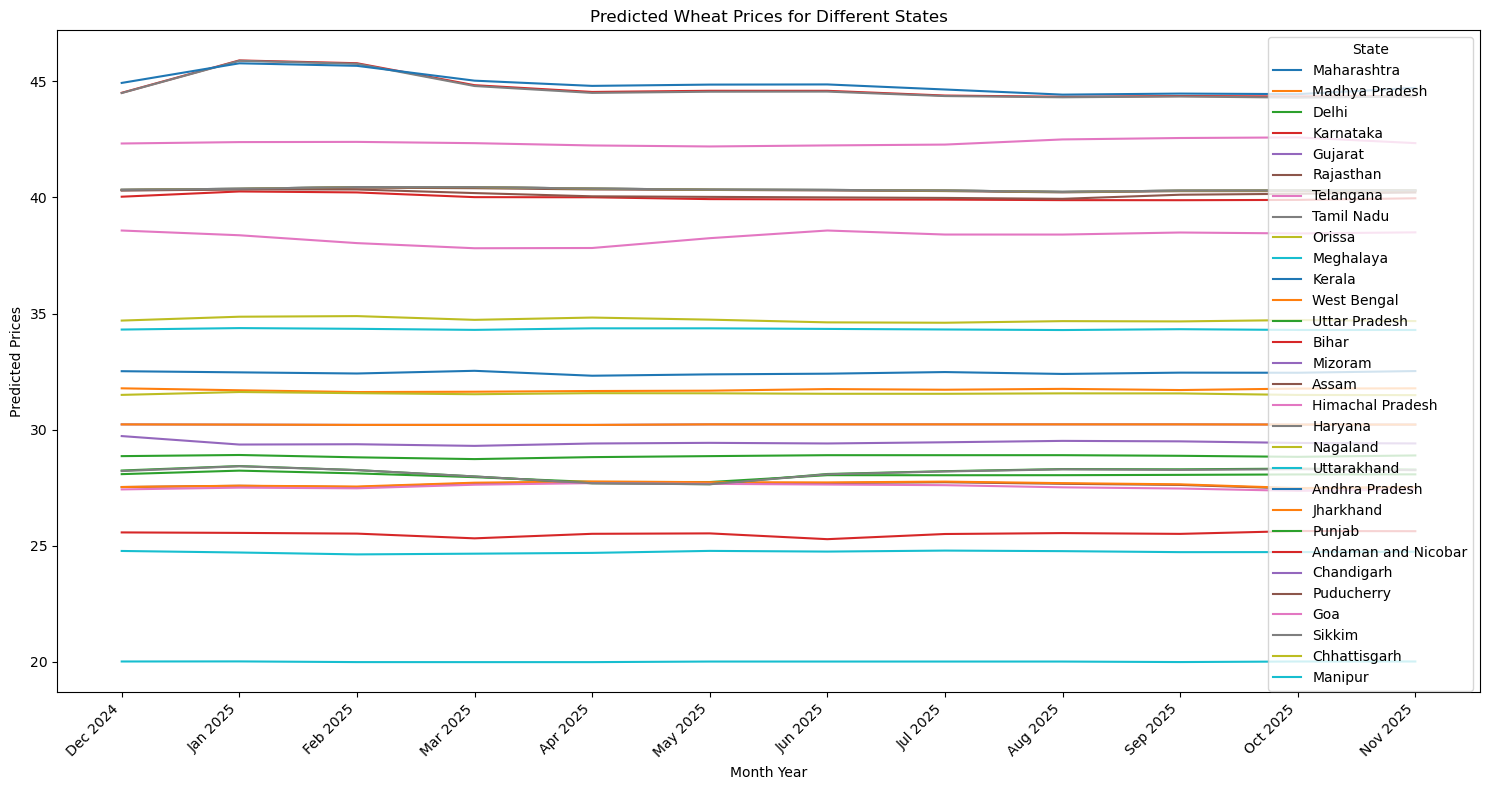

In [25]:
# Ensure 'Month_Year' is in string format for proper display
final_future_results['Month_Year'] = final_future_results['Date'].dt.strftime('%b %Y')

# Display the table in a readable format
print(final_future_results[['Month_Year', 'State', 'Predicted Prices']])

# Plot the predicted prices for each state
plt.figure(figsize=(15, 8))  # Adjust the size if necessary

# Loop through each state and plot the predicted prices
for state in final_future_results['State'].unique():
    state_data = final_future_results[final_future_results['State'] == state]
    
    # Plotting for each state
    plt.plot(state_data['Month_Year'], state_data['Predicted Prices'], label=state)

# Set xticks to display all months, using the unique Month_Year values
xticks = final_future_results['Month_Year'].unique()
plt.xticks(ticks=range(len(xticks)), labels=xticks, rotation=45, ha='right')

# Adding labels and title
plt.xlabel('Month Year')
plt.ylabel('Predicted Prices')
plt.title('Predicted Wheat Prices for Different States')
plt.legend(title='State')

# Optionally, adjust the layout and space between ticks
plt.tight_layout()
plt.show()